# Playing with Numerical Integrators
## Lotka Volterra model

## Messing with quiver plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Explicit euler method
for the equation
$y = (u,v)$ with
$$\dot y = (\dot u,\dot v) = (u(v-2) , v(1-u)) = f(y)$$
the explicit euler method is quite simply the easiest possible thing you could think of for an integration scheme
$$y_{n+1} = y_{n} + f(y_n)$$

In [81]:
# the differential equation
def f(u,v):
    return [u*(v-2),v*(1-u)]
# implicit timestep function
def f_imp(u,v,h):
    u_next = np.sqrt((v+u+2*h-2)**2 + 4*(2-2*h)*u)/(2*(2-2*h))
    v_next = v / (1-h*(1-u_next))
    return [u_next,v_next]

In [106]:
y_0 = (1.,3.)
# integration step
h = 0.05
y = np.array(y_0[:])
points = [y]

# integrate numerically
for i in range(450):
    y = y + h*np.array(f(y[0],y[1]))
    points.append(y)
points = np.array(points).T

In [107]:
# determine grid and arrow lengths for quiver plot
margin=0.2
u,v = np.mgrid[min(points[0])-margin:max(points[0])+margin:25j,
               min(points[1])-margin:max(points[1])+margin:25j]
du = np.multiply(u,v+np.ones(v.shape)*(-2))
dv = np.multiply(v,-u + np.ones(u.shape))
c = np.multiply(du,du) + np.multiply(dv,dv)

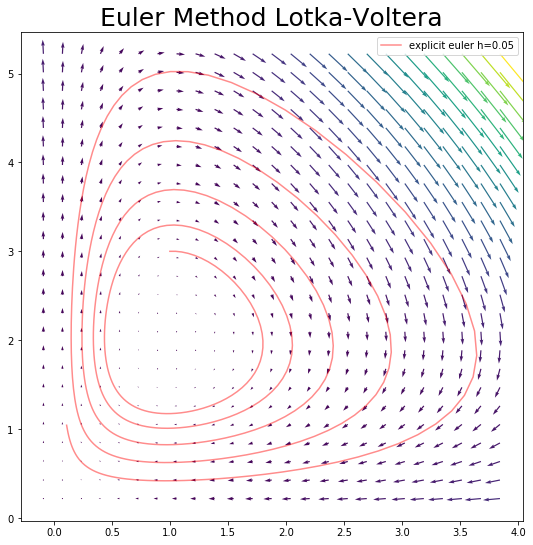

In [111]:
## quiver plot
fig, ax = plt.subplots(figsize=(9,9))
ax.quiver(u,v,du,dv,c)
# ax.set(aspect=1, title='Quiver Plot')
ax.plot(points[0],points[1],'r-',alpha=.45,label='explicit euler h={}'.format(h))
plt.title('Euler Method Lotka-Voltera',fontsize=25)
plt.legend()
# plt.savefig('euler_metod_lotka_voltera.png')
plt.show()

### The implicit euler method
This one works by solving for the equation
$$y_{n+1} = y_n + f(y_{n+1})$$
we can do this by hand, for the given values above this yields
$$
u_{n+1} = \frac{\sqrt{u_n^2 + 12v_n}}{6}
$$
and
$$
v_{n+1} = \frac{v_n}{u_{n+1}}
$$

In [104]:
y_0 = (1.,3.)
# integration step
h = 0.05
y = np.array(y_0[:])
points = [y]

In [105]:
for i in range(700):
    print(i,y)
    y = f_imp(y[0],y[1],h)
    points.append(y)
points = np.array(points).T

0 [1. 3.]
1 [0.9119854447980766, 3.013260539303716]
2 [0.8740927499399781, 3.0323502835748983]
3 [0.8595608033603103, 3.0537939016877087]
4 [0.8562245314924449, 3.0759058922246965]
5 [0.8582684243583998, 3.097859114898207]
6 [0.86284094320426, 3.119250789709503]
7 [0.8685285879441114, 3.1398910854447593]
8 [0.8746289592218243, 3.1596978156292574]
9 [0.8807942647618694, 3.1786434420577754]
10 [0.8868541160292674, 3.1967282743787164]
11 [0.8927269739214317, 3.2139668719824077]
12 [0.8983758325557707, 3.2303811115317567]
13 [0.9037860441060871, 3.245996620314694]
14 [0.9089542243796586, 3.2608409098050815]
15 [0.9138826964424559, 3.2749423701161193]
16 [0.9185766976494933, 3.2883297032991132]
17 [0.9230429639821277, 3.301031583622964]
18 [0.9272890009113759, 3.313076438518045]
19 [0.9313226973242914, 3.3244922967032324]
20 [0.9351521120637727, 3.335306676382382]
21 [0.9387853485791129, 3.3455464995214106]
22 [0.9422304757672206, 3.3552380247402596]
23 [0.9454954741317555, 3.36440679459863

653 [0.9999999999999992, 3.515339366124402]
654 [0.9999999999999992, 3.515339366124402]
655 [0.9999999999999992, 3.515339366124402]
656 [0.9999999999999992, 3.515339366124402]
657 [0.9999999999999992, 3.515339366124402]
658 [0.9999999999999992, 3.515339366124402]
659 [0.9999999999999992, 3.515339366124402]
660 [0.9999999999999992, 3.515339366124402]
661 [0.9999999999999992, 3.515339366124402]
662 [0.9999999999999992, 3.515339366124402]
663 [0.9999999999999992, 3.515339366124402]
664 [0.9999999999999992, 3.515339366124402]
665 [0.9999999999999992, 3.515339366124402]
666 [0.9999999999999992, 3.515339366124402]
667 [0.9999999999999992, 3.515339366124402]
668 [0.9999999999999992, 3.515339366124402]
669 [0.9999999999999992, 3.515339366124402]
670 [0.9999999999999992, 3.515339366124402]
671 [0.9999999999999992, 3.515339366124402]
672 [0.9999999999999992, 3.515339366124402]
673 [0.9999999999999992, 3.515339366124402]
674 [0.9999999999999992, 3.515339366124402]
675 [0.9999999999999992, 3.51533

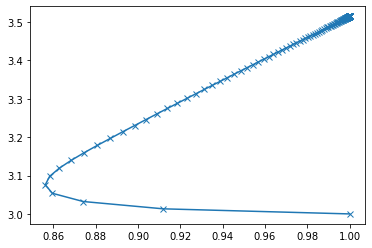

In [106]:
plt.plot(points[0],points[1],'x-')